# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

## 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
### Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [117]:
def skewness(x: pd.Series) -> float:
    return (x.mean() - x.median()) / x.std()

(df
 .groupby("Categoria")["Preco_Normal"]
 .aggregate(["mean", "median", skewness])
 .sort_values(by="skewness", ascending=False)
 .rename(columns={"mean": "Média", "median": "Mediana", "skewness": "Assimetria"})
 .round(2))

,Média,Mediana,Assimetria
Categoria,,,
lacteos,2385.22,989.0,0.36
frutas,1724.47,1195.0,0.32
instantaneos-y-sopas,765.49,439.0,0.28
congelados,2108.04,1519.0,0.28
verduras,1343.30,1180.0,0.16
belleza-y-cuidado-personal,1783.56,1569.0,0.10
comidas-preparadas,3095.04,3290.0,-0.10


Todas as categorias apresentam valores de média divergentes da mediana, mas vale apontar a maior discrepância para as categorias `lacteos`, `congelados` e `frutas`. Além disso, somente a categoria `comidas-preparadas` possui a mediana dos preços maior que a média. <br><br>
O valor de assimetria calculado pela fórmula $\frac{\mu - \mu_{\frac{1}{2}}}{\sigma}$ (onde $\mu_{\frac{1}{2}}$ denota a mediana) corresponde a essa observação, com valores positivos indicando a presença de uma cauda à direita na distribuição dos dados, e vice-versa.

## 2 - Traga o desvio padrão por categoria de produto.
### Qual o comportamento da média e mediana nas categorias com maior desvio?

In [4]:
def cv(x: pd.Series) -> float:
    return x.std() / x.mean()

stats = (df
        .groupby("Categoria")["Preco_Normal"]
        .aggregate(["mean", "median", skewness, "std", cv])
        .sort_values(by="cv", ascending=False)
        .rename(columns={
                "mean": "Média", 
                "median": "Mediana", 
                "skewness": "Assimetria",
                "std": "Desvio Padrão", 
                "cv": "Coeficiente de Variação"
                })
        .round(2))
stats

,Média,Mediana,Assimetria,Desvio Padrão,Coeficiente de Variação
Categoria,,,,,
lacteos,2385.22,989.0,0.36,3925.82,1.65
instantaneos-y-sopas,765.49,439.0,0.28,1170.23,1.53
belleza-y-cuidado-personal,1783.56,1569.0,0.10,2210.04,1.24
congelados,2108.04,1519.0,0.28,2111.54,1.00
frutas,1724.47,1195.0,0.32,1639.15,0.95
verduras,1343.30,1180.0,0.16,1012.70,0.75
comidas-preparadas,3095.04,3290.0,-0.10,2019.91,0.65


A categoria `lacteos`, que apresenta a maior assimetria, também apresenta o maior desvio-padrão. Nesse caso, a assimetria correlaciona com o desvio-padrão, mas considerando a categoria `frutas`, nota-se que nem sempre uma maior assimetria está relacionada a um alto desvio-padrão. Essa categoria apresenta o terceiro menor coeficiente de variação (ou desvio-padrão relativo, definido como o desvio-padrão dividido pela média), assim como o terceiro menor desvio-padrão, mas possui o segundo maior valor de assimetria.

## 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

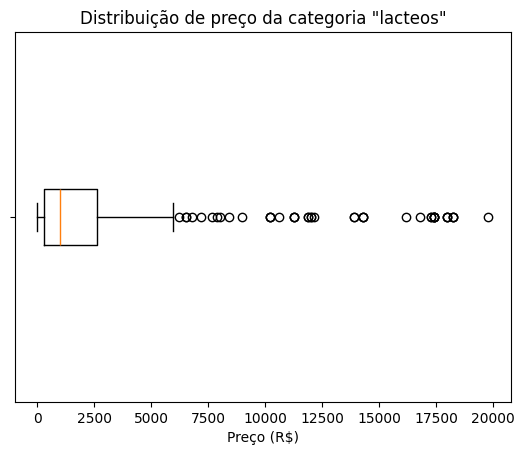

In [5]:
max_std_ctg = stats.sort_values(by="Desvio Padrão", ascending=False).index[0]
s = df[df["Categoria"] == max_std_ctg]

plt.boxplot(s["Preco_Normal"], vert=False, tick_labels=[""])
plt.title(f"Distribuição de preço da categoria \"{max_std_ctg}\"")
plt.xlabel("Preço (R$)")
plt.show()

Podem ser observados vários *outliers* na distribuição do preço, como esperado pela assimetria positiva calculada anteriormente. Pelo gráfico, o valor médio de R$ 2385,22 encontra-se entre o percentil 50 e 75, "puxado" para cima pelos aos *outliers*.

## 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

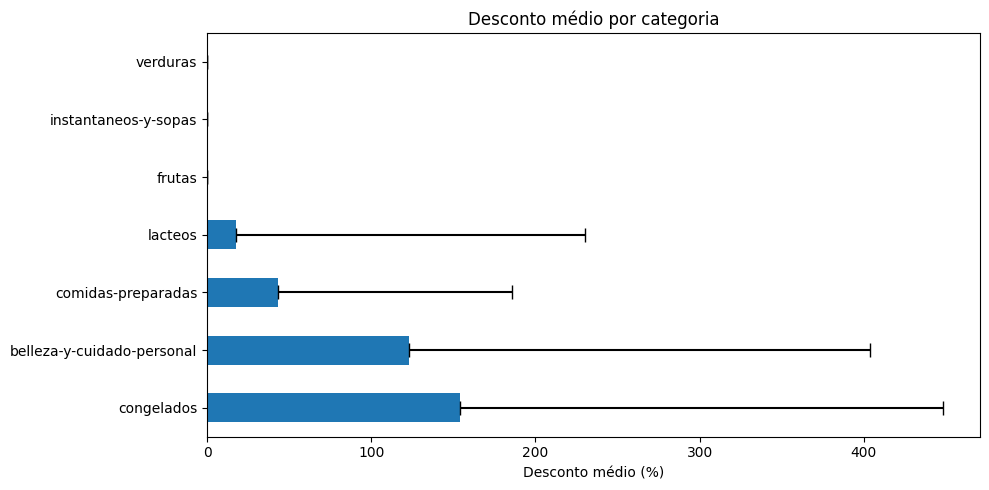

In [ ]:
((t := df
        .groupby("Categoria")
        ["Desconto"]
        .aggregate(["mean", "std"])
        .sort_values(by="mean", ascending=False))
    .plot.barh(figsize=(10, 5), y="mean", xerr=[[0]*t.shape[0],t["std"]], capsize=5, legend=False))

plt.xlabel("Desconto médio (R$)")
plt.ylabel("")
plt.title("Desconto médio por categoria")
plt.tight_layout()
plt.show()

## 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [118]:
tdf = (df
       .groupby(["Categoria", "Marca"])
       ["Desconto"]
       .aggregate(["mean", "std", "count"])
       .dropna()
       .rename(columns={
               "mean": "Desconto Médio (R$)", 
               "std": "Desvio Padrão", 
               "count": "Quantidade de Produtos"
               })
       .round(2))

tdf

Desconto Médio (R$)  \
Categoria                  Marca                                            
belleza-y-cuidado-personal Always                                  123.75   
                           Aquafresh                               444.67   
                           Ballerina                                34.08   
                           Bellekiss                                 0.00   
                           BiO                                     650.00   
...                                                                   ...   
lacteos                    Zerolacto                                 0.00   
verduras                   Agrosano                                  0.00   
                           Dole                                      0.00   
                           Frutas Y Verduras Propias                 0.00   
                           Jumbo                                     0.00   

                                                      Desvio Padrão  \
Categoria                  Marca                                      
belleza-y-cuidado-personal Always                            247.50   
                           Aquafresh                         386.34   
                           Ballerina                         118.07   
                           Bellekiss                           0.00   
                           BiO                                 0.00   
...                                                             ...   
lacteos                    Zerolacto                           0.00   
verduras                   Agrosano                            0.00   
                           Dole                                0.00   
                           Frutas Y Verduras Propias           0.00   
                           Jumbo                               0.00   

                                                      Quantidade de Produtos  
Categoria                  Marca                                              
belleza-y-cuidado-personal Always                                          4  
                           Aquafresh                                       3  
                           Ballerina                                      12  
                           Bellekiss                                       4  
                           BiO                                             4  
...                                                                      ...  
lacteos                    Zerolacto                                       4  
verduras                   Agrosano                                        2  
                           Dole                                            3  
                           Frutas Y Verduras Propias                      56  
                           Jumbo                                           3  

[112 rows x 3 columns]

In [119]:
fig = px.treemap(tdf.reset_index(), path=[px.Constant("Categorias"), "Categoria", "Marca"], 
                 values="Desconto Médio (R$)", color="Desvio Padrão", color_continuous_scale="Reds", 
                 title="Desconto médio por categoria e marca",
                 hover_data=["Quantidade de Produtos"])

fig.update_traces(marker={"cornerradius": 5})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.data[0].hovertemplate = (
    "Desconto médio: R$ %{value:.2f}<br>" +
    "Desvio padrão: R$ %{color:.2f}<br>" +
    "Quantidade de produtos: %{customdata[0]}<extra></extra>"
)
fig.show()